#### Evaluate the enthalpy flux fixer in fully-coupled runs

Gustavo Marques (gmarques@ucar.edu)

In [1]:
from datetime import date
print("Last update:", date.today())

Last update: 2022-01-25


## Brief summary of the experiments 

* bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001: this is the out-of-the-box case where enthalpy fluxes are calculated inside MOM6;

* bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001: this is the modified case where enthalpy fluxes are calculated in the mediator and sent to the ocean model. To balance these terms, the mediator sends a constant global heat "fixer" to the ATM via sensible heat flux. 

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings, os
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import ztplot, xyplot
warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

Basemap module not found. Some regional plots may not function properly


In [3]:
path = '/glade/scratch/gmarques/'
exps = ['bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001', \
        'bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001']
labels = ['CTRL', 'CPL']

# set this to true to save the plots
saveplot = False
if saveplot:
    os.system('mkdir PNG')

In [4]:
def get_data(full_path, variables):
  def preprocess(ds):
    ''' Return the dataset with variable'''
    return ds[variables]
  ds = xr.open_mfdataset(full_path, data_vars='minimal', \
                         coords='minimal', compat='override', preprocess=preprocess)
  return ds

In [5]:
# load grid and pre-difined masks
grd = MOM6grid(path+exps[0]+'/run/'+exps[0]+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

MOM6 grid successfully loaded... 

11.16427964664149 64.78854837178643 [391, 434]


### Heat fluxes

#### 1) from CPL table

#### bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001


#### bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001
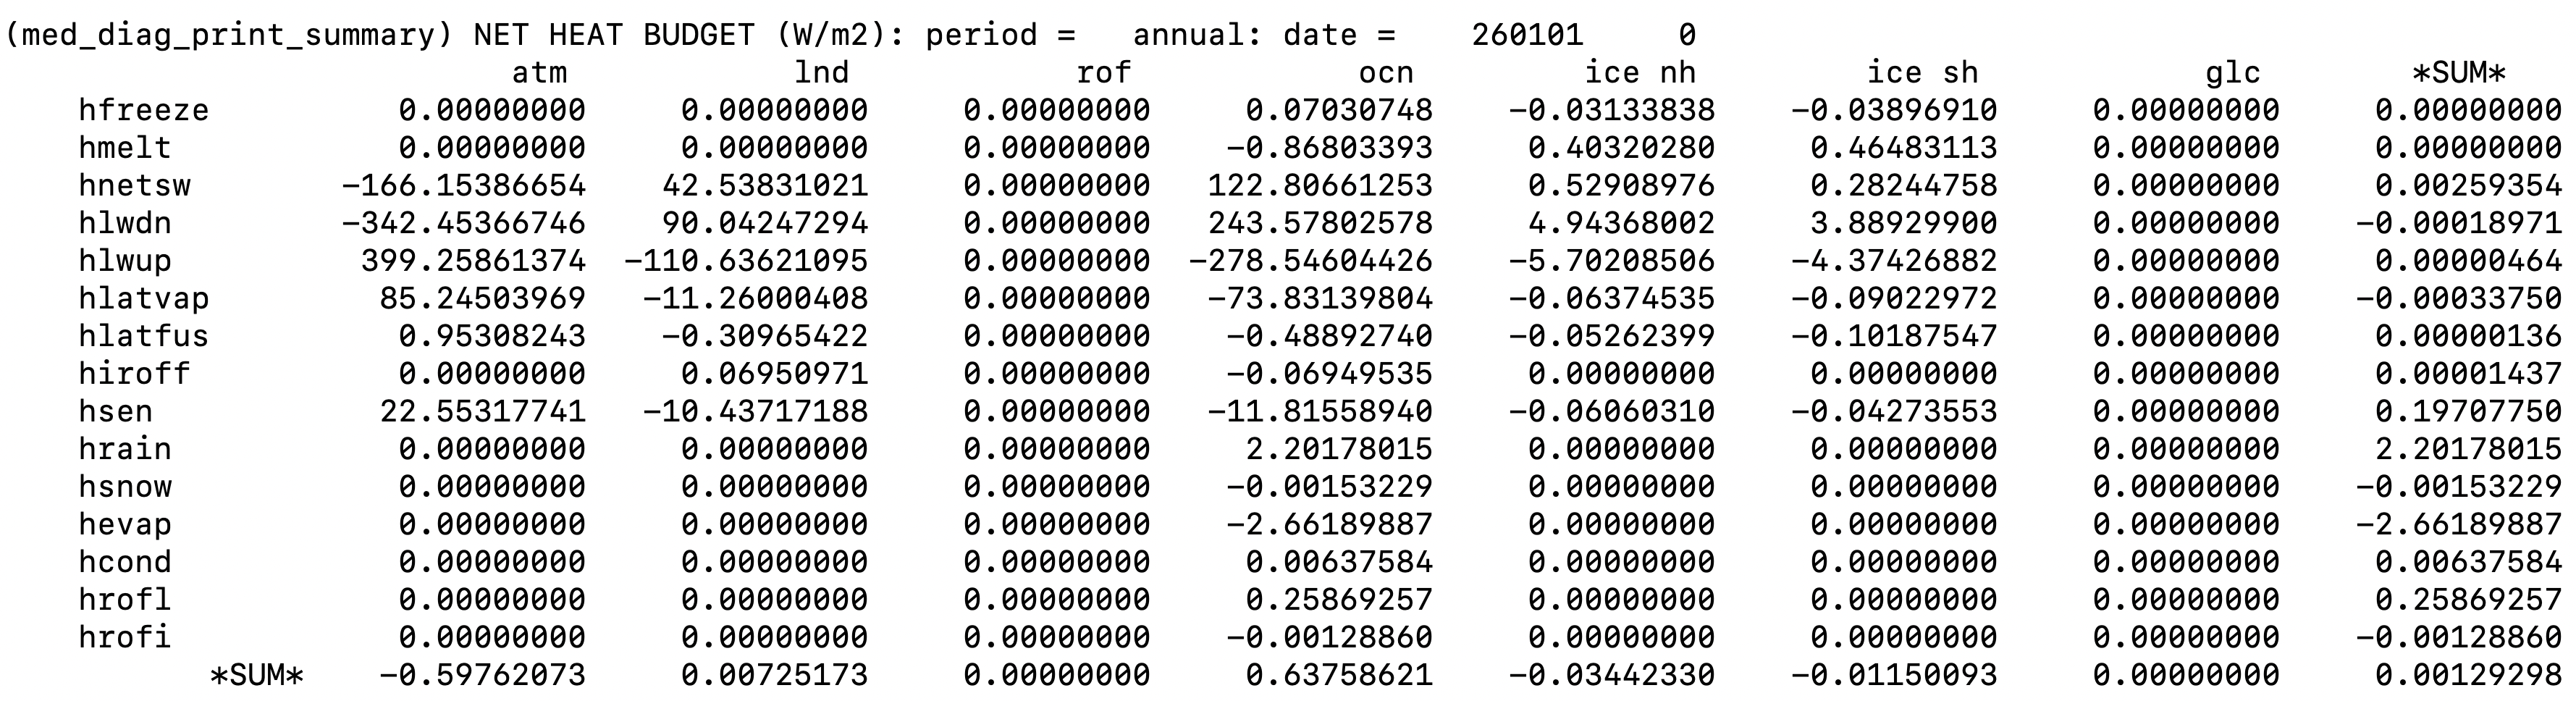

#### 2) From mom history files

In [ ]:
heat_table_ctrl = [0.04589052, -0.94538287, 116.68010242, 
              240.79639716-277.65459588, -67.31215346,
             -0.21089012, 0.00000000, -9.61495373,
             2.06414119, -0.00118755, -2.44806914, 0.00332451,
             0.20587172, 0.0]

heat_table_cpl = [0.07030748, -0.86803393, 122.80661253, 
              243.57802578-278.54604426, -73.83139804,
             -0.48892740, -0.06949535, -11.81558940,
             2.20178015, -0.00153229, -2.66189887, 0.00637584,
             0.25869257, -0.00128860]

heat_table_terms = ['hfreeze','hmelt','SW','LW','LAT_EVAP','LAT_FUS','HIROFF','SEN',
                   'hrain','hsnow','hevap','hcond','hrofl','hrofi']

In [12]:
ds1 = xr.open_dataset(path+exps[0]+'/run/'+exps[0]+'.mom6.frc_0025.nc')
ds2 = xr.open_dataset(path+exps[1]+'/run/'+exps[1]+'.mom6.frc_0025.nc')

#### Surface ocean heat flux

In [13]:
ds1.hfds.long_name

'Surface ocean heat flux from SW+LW+latent+sensible+masstransfer+frazil+seaice_melt_heat'

In [16]:
net_heat_surface1 = np.ma.masked_invalid(ds1.hfds.mean('time').values)
net_heat_surface2 = np.ma.masked_invalid(ds2.hfds.mean('time').values)

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1 = ax.flatten()
xyplot(net_heat_surface1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title=labels[0])
xyplot(net_heat_surface2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title=labels[1])

#### Heat_PmE

In [19]:
Heat_PmE1 = np.ma.masked_invalid(ds1.Heat_PmE.mean('time').values)
Heat_PmE2 = np.ma.masked_invalid(ds2.Heat_PmE.mean('time').values)

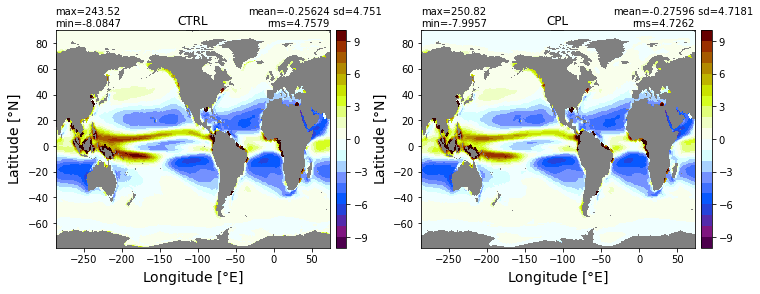

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1 = ax.flatten()
xyplot(Heat_PmE1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title=labels[0])
xyplot(Heat_PmE2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title=labels[1])

#### SW

In [14]:
sw1 = np.ma.masked_invalid(ds1.rsntds.mean('time').values)
sw2 = np.ma.masked_invalid(ds2.rsntds.mean('time').values)

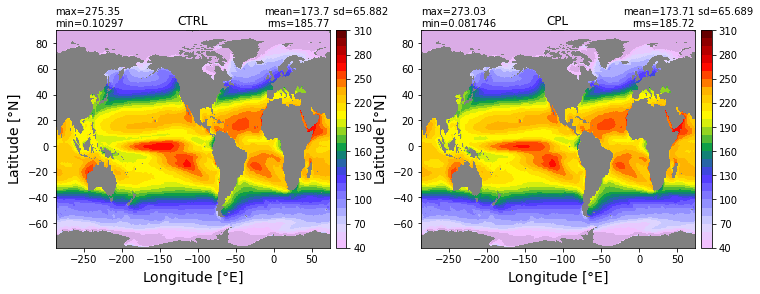

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1 = ax.flatten()
xyplot(sw1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title=labels[0])
xyplot(sw2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title=labels[1])

#### LW

In [16]:
lw1 = np.ma.masked_invalid(ds1.rlntds.mean('time').values)
lw2 = np.ma.masked_invalid(ds2.rlntds.mean('time').values)

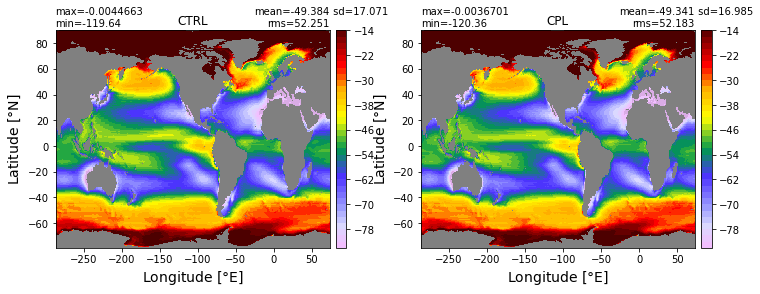

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1 = ax.flatten()
xyplot(lw1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title=labels[0])
xyplot(lw2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title=labels[1])

### Net heat flux over entire run using MOM diags

In [6]:
mom1 = xr.open_mfdataset(path+exps[0]+'/run/'+exps[0]+'.mom6.frc_*.nc')
mom2 = xr.open_mfdataset(path+exps[1]+'/run/'+exps[1]+'.mom6.frc_*.nc')

In [9]:
frazil1 = np.ma.masked_invalid(mom1.frazil.mean('time').values)
frazil2 = np.ma.masked_invalid(mom2.frazil.mean('time').values)

In [10]:
net_heat_surface1 = np.ma.masked_invalid(mom1.net_heat_surface.mean('time').values)
net_heat_surface2 = np.ma.masked_invalid(mom2.net_heat_surface.mean('time').values)

In [11]:
net_heat_cpl1 = np.ma.masked_invalid(mom1.net_heat_coupler.mean('time').values)
net_heat_cpl2 = np.ma.masked_invalid(mom2.net_heat_coupler.mean('time').values)

In [12]:
Heat_PmE1 = np.ma.masked_invalid(mom1.Heat_PmE.mean('time').values)
Heat_PmE2 = np.ma.masked_invalid(mom2.Heat_PmE.mean('time').values)

In [26]:
mom1

<xarray.Dataset>
Dimensions:                                (xq: 540, yh: 458, time: 8, nv: 2, xh: 540, yq: 458, scalar_axis: 1)
Coordinates:
  * xq                                     (xq) float64 -286.3 -285.7 ... 73.0
  * yh                                     (yh) float64 -79.2 -79.08 ... 87.74
  * time                                   (time) object 0021-07-02 12:00:00 ...
  * nv                                     (nv) float64 1.0 2.0
  * xh                                     (xh) float64 -286.7 -286.0 ... 72.67
  * yq                                     (yq) float64 -79.14 -79.01 ... 87.74
  * scalar_axis                            (scalar_axis) float64 0.0
Data variables: (12/51)
    taux                                   (time, yh, xq) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    tauy                                   (time, yq, xh) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    ustar                                  (time, yh, xh) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    PRCmE                                  (time, yh, xh) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    lprec                                  (time, yh, xh) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    fprec                                  (time, yh, xh) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    ...                                     ...
    net_massout                            (time, yh, xh) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    net_massin                             (time, yh, xh) float64 dask.array<chunksize=(1, 458, 540), meta=np.ndarray>
    average_T1                             (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2                             (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT                             (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds                              (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:          bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001.mom...
    title:             MOM6 diagnostic fields table for CESM case: bmom.e23.f...
    associated_files:  area_t: bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years...
    grid_type:         regular
    grid_tile:         N/A

In [33]:
heat_content_lrunoff1 = np.ma.masked_invalid(mom1.heat_content_massout.mean('time').values)
heat_content_lrunoff2 = np.ma.masked_invalid(mom2.heat_content_evap.mean('time').values)

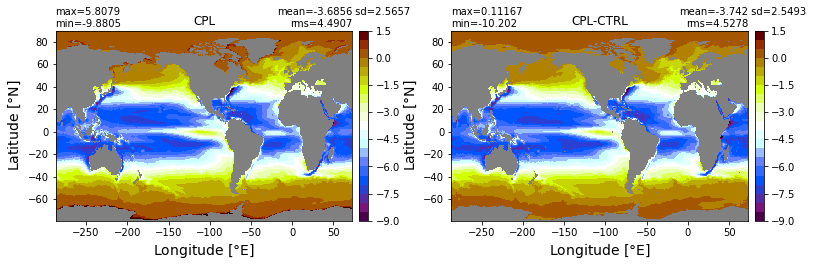

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,3.5))
ax1 = ax.flatten()
xyplot(heat_content_lrunoff1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title='CPL')
xyplot(heat_content_lrunoff2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title='CPL-CTRL')

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,3.5))
ax1 = ax.flatten()
xyplot(net_heat_surface2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title='CPL')
xyplot(net_heat_surface2  - net_heat_surface1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title='CPL-CTRL')

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,3.5))
ax1 = ax.flatten()
xyplot(Heat_PmE2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title='CPL')
xyplot(Heat_PmE2-Heat_PmE1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title='CPL-CTRL')

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,3.5))
ax1 = ax.flatten()
xyplot(Heat_PmE2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title='CPL')
xyplot(Heat_PmE2-Heat_PmE1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title='CPL-CTRL')

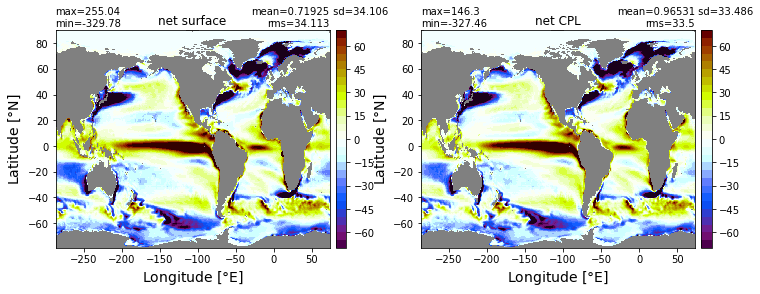

In [21]:
# control
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1 = ax.flatten()
xyplot(net_heat_surface1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title='net surface')
xyplot(net_heat_cpl1 + frazil1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title='net CPL')

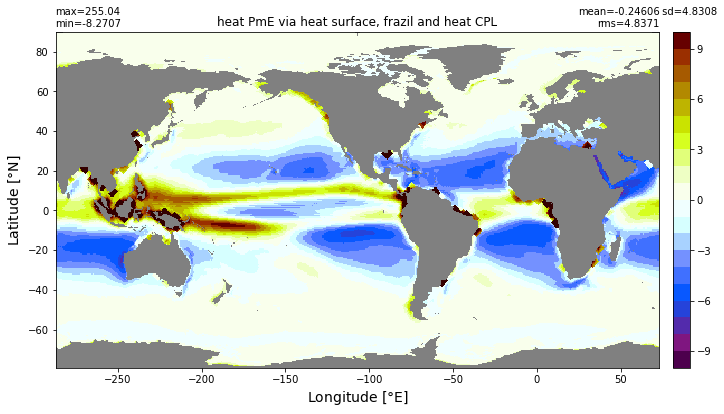

In [24]:
xyplot(net_heat_surface1 - (net_heat_cpl1+frazil1),grd.geolon, grd.geolat, grd.area_t, 
       title='heat PmE via heat surface, frazil and heat CPL')

In [25]:
# via CPL
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1 = ax.flatten()
xyplot(net_heat_surface2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title='net surface')
xyplot(net_heat_cpl2+frazil2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title='net CPL')

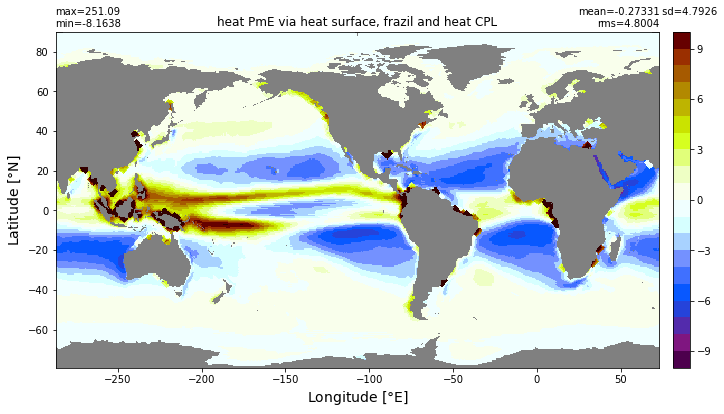

In [26]:
xyplot(net_heat_surface2 - (net_heat_cpl2+frazil2),grd.geolon, grd.geolat, grd.area_t, 
       title='heat PmE via heat surface, frazil and heat CPL')

In [14]:
# heat PmE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1 = ax.flatten()
xyplot(Heat_PmE1,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[0], title=labels[0])
xyplot(Heat_PmE2,grd.geolon, grd.geolat, grd.area_t, 
       axis=ax1[1], title=labels[1])

### Globally-averaged ocean properties

In [22]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
variables = ['thetaoga', 'soga']
for i in range(len(exps)):
  tmp = path+exps[i]+'/run/*mom6.hm_*_01.nc'
  print(tmp)
  ds = get_data(tmp,variables)
  ds['thetaoga'].plot(ax=ax[0], label=labels[i], lw=3)
  ds['soga'].plot(ax=ax[1], lw=3)

ax[0].set_title(ds.thetaoga.attrs['long_name']); ax[0].set_ylabel(ds.thetaoga.attrs['units'])
ax[1].set_title(ds.soga.attrs['long_name']); ax[1].set_ylabel(ds.soga.attrs['units'])
ax[0].legend()
ax[0].set_xlabel('Year')
if saveplot:
    fname = 'PNG/global_means.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001/run/*mom6.hm_*_01.nc
/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001/run/*mom6.hm_*_01.nc


In [11]:
%matplotlib inline
variables = ['APE', 'KE', 'Salt', 'Heat', 'age']
fig, ax = plt.subplots(nrows=len(variables), ncols=1, figsize=(10,18))
for i in range(len(exps)): 
  ds = xr.open_dataset(path+exps[i]+'/run/ocean.stats.nc')
  #ds = ds.isel(Time=range(1000, 21172))
  for var, j in zip(variables, range(len(variables))):
    if len(ds[var].shape) > 1:
        tmp = ds[var].sum(axis=1)
    else:
        tmp = ds[var]
    tmp.plot(ax=ax[j], label=labels[i], lw=2)
    ax[j].set_xlabel('')
    
ax[j].set_xlabel('Time'); ax[j].legend()
if saveplot:
    fname = 'PNG/ocean_stats.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

### Mixed layer depth

In [12]:
filepath = '/glade/work/gmarques/cesm/datasets/MLD/deBoyer/deBoyer_MLD_remapped_to_tx06v1.nc'
print('\n Reading climatology from: ', filepath)
mld_obs = xr.open_dataset(filepath)
months = [0,1,2]
obs_JFM = np.ma.masked_invalid(mld_obs.mld.isel(time=months).mean('time').values)
months = [6,7,8]
obs_JAS = np.ma.masked_invalid(mld_obs.mld.isel(time=months).mean('time').values)
obs_winter = obs_JAS.copy(); obs_summer = obs_JAS.copy()
j = np.abs( grd.geolat[:,0] - 0. ).argmin()
obs_winter[j::,:] = obs_JFM[j::,:]
obs_summer[0:j,:] = obs_JFM[0:j,:]

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
def add_labels(ax, nh='JFM', sh='JAS'):
    ax.plot([grd.geolon[0,0], grd.geolon[0,-1]], [0,0], 'k--', lw=0.5)
    ax.text(25, 7, nh, ha="center", va="center", size=12, bbox=bbox_props)
    ax.text(25, -7, sh, ha="center", va="center", size=12, bbox=bbox_props)


 Reading climatology from:  /glade/work/gmarques/cesm/datasets/MLD/deBoyer/deBoyer_MLD_remapped_to_tx06v1.nc


In [13]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax1 = ax.flatten()
plt.suptitle('Mean Winter MLD, JFM(NH), JAS(SH)')
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_MLD_winter.nc')
  if i == 0:
   control = np.ma.masked_invalid(ds.MLD_winter.values)
   xyplot(control, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i], clim=(0,1500), nbins=100,
         colormap=plt.cm.nipy_spectral); add_labels(ax1[i])
  else:
   var = np.ma.masked_invalid(ds.MLD_winter.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i+1], clim=(0,1500),
         colormap=plt.cm.nipy_spectral, nbins=100); add_labels(ax1[i+1])


xyplot(obs_winter, grd.geolon, grd.geolat, grd.area_t, title='deBoyer', axis=ax1[1], clim=(0,1500), nbins=100,
       colormap=plt.cm.nipy_spectral); add_labels(ax1[1])

diff = var - control
xyplot(diff, grd.geolon, grd.geolat, grd.area_t, title=str(labels[1]) +'-' +str(labels[0]), axis=ax1[-1], 
       colormap=plt.cm.bwr, nbins=50); add_labels(ax1[-1])

if saveplot:
    fname = 'PNG/MLD_winter.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

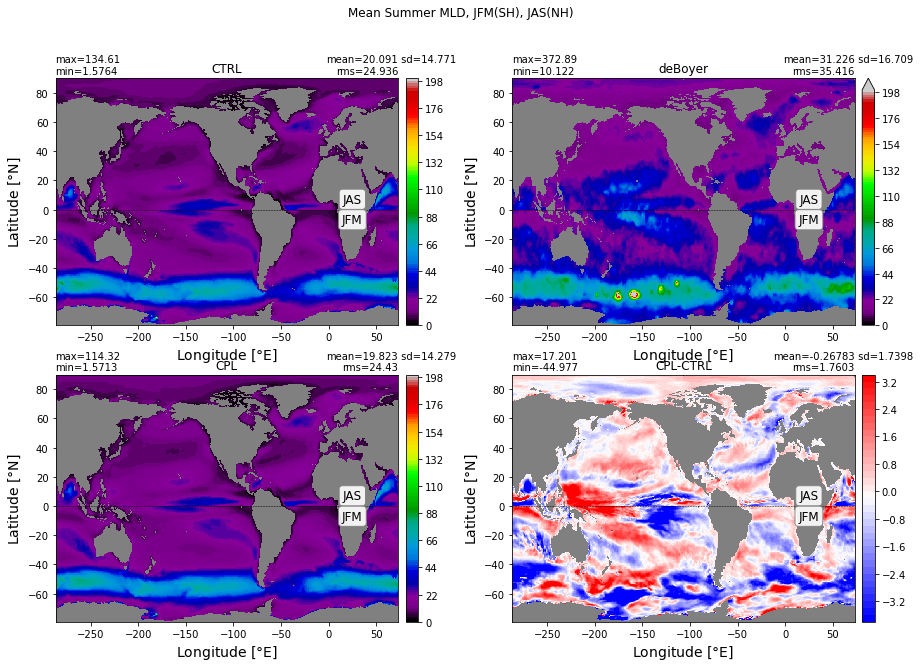

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax1 = ax.flatten()
plt.suptitle('Mean Summer MLD, JFM(SH), JAS(NH)')
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_MLD_summer.nc')
  if i == 0:
   control = np.ma.masked_invalid(ds.MLD_summer.values)
   xyplot(control, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i], clim=(0,200), nbins=100,
         colormap=plt.cm.nipy_spectral); add_labels(ax1[i], sh='JFM', nh='JAS')
  else:
   var = np.ma.masked_invalid(ds.MLD_summer.values) 
   xyplot(var, grd.geolon, grd.geolat, grd.area_t, title=str(labels[i]), axis=ax1[i+1], clim=(0,200), nbins=100,
         colormap=plt.cm.nipy_spectral); add_labels(ax1[i+1], sh='JFM', nh='JAS')

xyplot(obs_summer, grd.geolon, grd.geolat, grd.area_t, title='deBoyer', axis=ax1[1], clim=(0,200), nbins=100,
       colormap=plt.cm.nipy_spectral); add_labels(ax1[1], sh='JFM', nh='JAS')

diff = var - control
xyplot(diff, grd.geolon, grd.geolat, grd.area_t, title=str(labels[1]) +'-' +str(labels[0]), axis=ax1[-1], 
       colormap=plt.cm.bwr, nbins=50); add_labels(ax1[-1], sh='JFM', nh='JAS')

if saveplot:
    fname = 'PNG/MLD_summer.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

###  Poleward Heat Transport

In [16]:
def get_heat_transport_obs():
  import netCDF4
  """Plots model vs obs poleward heat transport for the global, Pacific and Atlantic basins"""
  # Load Observations
  fObs = netCDF4.Dataset('/glade/work/gmarques/cesm/datasets/Trenberth_and_Caron_Heat_Transport.nc')
  #Trenberth and Caron
  yobs = fObs.variables['ylat'][:]
  NCEP = {}; NCEP['Global'] = fObs.variables['OTn']
  NCEP['Atlantic'] = fObs.variables['ATLn'][:]; NCEP['IndoPac'] = fObs.variables['INDPACn'][:]
  ECMWF = {}; ECMWF['Global'] = fObs.variables['OTe'][:]
  ECMWF['Atlantic'] = fObs.variables['ATLe'][:]; ECMWF['IndoPac'] = fObs.variables['INDPACe'][:]

  #G and W
  Global = {}
  Global['lat'] = np.array([-30., -19., 24., 47.])
  Global['trans'] = np.array([-0.6, -0.8, 1.8, 0.6])
  Global['err'] = np.array([0.3, 0.6, 0.3, 0.1])

  Atlantic = {}
  Atlantic['lat'] = np.array([-45., -30., -19., -11., -4.5, 7.5, 24., 47.])
  Atlantic['trans'] = np.array([0.66, 0.35, 0.77, 0.9, 1., 1.26, 1.27, 0.6])
  Atlantic['err'] = np.array([0.12, 0.15, 0.2, 0.4, 0.55, 0.31, 0.15, 0.09])

  IndoPac = {}
  IndoPac['lat'] = np.array([-30., -18., 24., 47.])
  IndoPac['trans'] = np.array([-0.9, -1.6, 0.52, 0.])
  IndoPac['err'] = np.array([0.3, 0.6, 0.2, 0.05,])

  GandW = {}
  GandW['Global'] = Global
  GandW['Atlantic'] = Atlantic
  GandW['IndoPac'] = IndoPac
  return NCEP, ECMWF, GandW, yobs

NCEP, ECMWF, GandW, yobs = get_heat_transport_obs()
from mom6_tools.poleward_heat_transport import annotateObs, plotGandW, plotHeatTrans, heatTrans

In [17]:
def get_adv_diff(ds):
  # create a ndarray subclass
  class C(np.ndarray): pass

  varName = 'T_ady_2d'
  if varName in ds.variables:
    tmp = np.ma.masked_invalid(ds[varName].values)
    tmp = tmp[:].filled(0.)
    advective = tmp.view(C)
    advective.units = 'W'
  else:
    raise Exception('Could not find "T_ady_2d"')

  varName = 'T_diffy_2d'
  if varName in ds.variables:
    tmp = np.ma.masked_invalid(ds[varName].values)
    tmp = tmp[:].filled(0.)
    diffusive = tmp.view(C)
    diffusive.units = 'W'
  else:
    diffusive = None
    warnings.warn('Diffusive temperature term not found. This will result in an underestimation of the heat transport.')

  varName = 'T_lbm_diffy'
  if varName in ds.variables:
    tmp = np.ma.masked_invalid(ds_sel[varName].sum('z_l').values)
    tmp = tmp[:].filled(0.)
    diffusive = diffusive + tmp.view(C)
  else:
    warnings.warn('Lateral boundary mixing term not found. This will result in an underestimation of the heat transport.')
    
  return advective, diffusive

<center> <font size="4">Global Heat Transport</font>

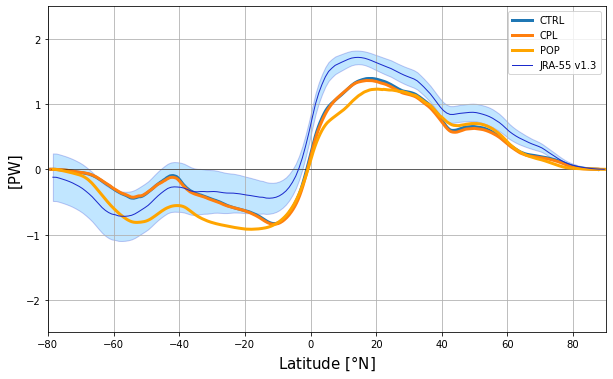

In [19]:
# Global Heat Transport
plt.figure(figsize=(10,6))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_heat_transport.nc')
  adv, diff = get_adv_diff(ds)
  HT = heatTrans(adv,diff); y = ds.yq
  plt.plot(y, HT, linewidth=3,label=labels[i]); 
    
plt.xlim(-80,90); plt.ylim(-2.5,3.0); plt.grid(True); 
plt.plot(y, y*0., 'k', linewidth=0.5)
#plt.plot(yobs,NCEP['Global'],'k--',linewidth=0.5,label='NCEP'); 
#plt.plot(yobs,ECMWF['Global'],'k.',linewidth=0.5,label='ECMWF')
#plotGandW(GandW['Global']['lat'],GandW['Global']['trans'],GandW['Global']['err'])
pop = xr.open_dataset('/glade/u/home/bryan/MOM6-modeloutputanalysis/MHT_mean.g210.GIAF_JRA.v13.gx1v7.01.nc')
jra = xr.open_dataset('/glade/work/gmarques/cesm/datasets/Heat_transport/jra55fcst_v1_3_annual_1x1/nht_jra55do_v1_3.nc')
plt.plot(pop.lat_aux_grid.values,pop.MHT_global.values,'orange',linewidth=3,label='POP')
jra_mean_global = jra.nht[:,0,:].mean('time').values
jra_std_global = jra.nht[:,0,:].std('time').values
plt.plot(jra.lat, jra_mean_global,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_global-jra_std_global, jra_mean_global+jra_std_global,
    alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.legend(loc=0,fontsize=10)
plt.ylim(-2.5,2.5)
if saveplot:
    fname = 'PNG/global_poleward_heat_transport.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

In [23]:
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth)

11.16427964664149 64.78854837178643 [391, 434]


<center> <font size="4">Atlantic Heat Transport</font>

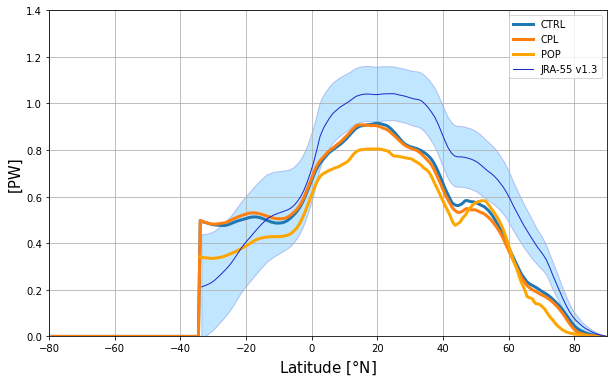

In [25]:
# Atlantic Heat Transport
m = 0*basin_code; m[(basin_code==2) | (basin_code==4) | (basin_code==6) | (basin_code==7) | (basin_code==8)] = 1
plt.figure(figsize=(10,6))
for i in range(len(exps)):
  ds = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_heat_transport.nc')
  adv, diff = get_adv_diff(ds)
  HT = heatTrans(adv,diff, vmask=m*np.roll(m,-1,axis=-2)); y = ds.yq
  plt.plot(y, HT, linewidth=3,label=labels[i])
    
plt.xlim(-80,90); plt.ylim(-0.1,2.0)
plt.grid(True); plt.plot(y, y*0., 'k', linewidth=0.5)
#plt.plot(yobs,NCEP['Atlantic'],'k--',linewidth=0.5,label='NCEP'); 
#plt.plot(yobs,ECMWF['Atlantic'],'k.',linewidth=0.5,label='ECMWF'); 
#plotGandW(GandW['Atlantic']['lat'],GandW['Atlantic']['trans'],GandW['Atlantic']['err'])

plt.plot(pop.lat_aux_grid.values,pop.MHT_atl.values,'orange',linewidth=3,label='POP')
jra_mean_atl = jra.nht[:,1,:].mean('time').values
jra_std_atl = jra.nht[:,1,:].std('time').values
plt.plot(jra.lat, jra_mean_atl,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_atl-jra_std_atl, jra_mean_atl+jra_std_atl,
    alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.ylabel('[PW]',fontsize=15); plt.legend(loc=0,fontsize=10)
plt.ylim(0,1.4)
if saveplot:
    fname = 'PNG/atlantic_poleward_heat_transport.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

### Meridional Overturning Circulation

<center> <font size="4">Global</font>
 </center>
<table><tr><td><img   src='../../bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001/PNG/MOC/bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001_MOC_global.png'></td>
             <td><img src= '../../bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001/PNG/MOC/bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001_MOC_global.png'></td></tr>
</table>

<center> <font size="4">Atlantic</font></center>

<table><tr><td><img   src= '../../bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001/PNG/MOC/bmom.e23.f09_t061_zstar_N65.nuopc.ctrl_20years.001_MOC_Atlantic.png'></td>
             <td><img src='../../bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001/PNG/MOC/bmom.e23.f09_t061_zstar_N65.nuopc.enthalpy_via_cpl_20years.001_MOC_Atlantic.png'></td></tr>
</table>

#### AMOC time series @ 26N and 45N

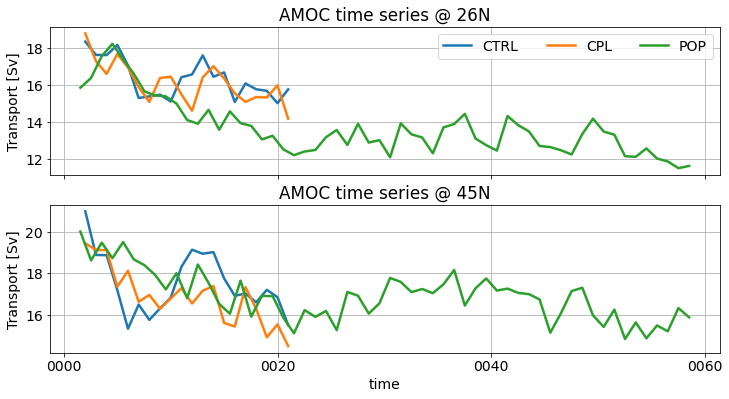

In [33]:
matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=True)
for i in range(len(exps)):
  ds1 = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_MOC.nc')
  ds1.amoc_26.plot(ax=ax[0], label=labels[i], lw=2.5)
  ds2 = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_MOC.nc')
  ds2.amoc_45.plot(ax=ax[1], label=labels[i], lw=2.5)


# load AMOC from POP JRA-55
amoc_pop_26 = xr.open_dataset('/glade/u/home/bryan/MOM6-modeloutputanalysis/'
            'AMOC_series_26n.g210.GIAF_JRA.v13.gx1v7.01.nc').sel(time=slice('0001-01-01', '0059-01-01'))
amoc_pop_26.AMOC_26n.plot(ax=ax[0], label='POP', lw=2.5)

amoc_pop_45 = xr.open_dataset('/glade/u/home/bryan/MOM6-modeloutputanalysis/'
            'AMOC_series_45n.g210.GIAF_JRA.v13.gx1v7.01.nc').sel(time=slice('0001-01-01', '0059-01-01'))
amoc_pop_45.AMOC_45n.plot(ax=ax[1], label='POP', lw=2.5)


ax[0].set_ylabel('Transport [Sv]'); ax[0].legend(ncol=5); ax[0].set_title('AMOC time series @ 26N')
ax[0].set_xlabel('');ax[0].grid()
ax[1].set_ylabel('Transport [Sv]'); ax[1].set_title('AMOC time series @ 45N');ax[1].grid()

if saveplot:
    fname = 'PNG/AMOC_time_series.png'
    plt.savefig(fname, bbox_inches='tight',dpi=300)

#### AMOC Profile @ 26N

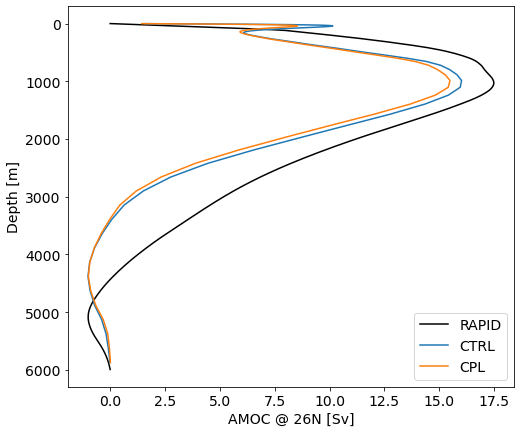

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
rapid_vertical = xr.open_dataset('/glade/work/gmarques/cesm/datasets/RAPID/moc_vertical.nc')
ax.plot(rapid_vertical.stream_function_mar.mean('time'), rapid_vertical.depth, 'k', label='RAPID')
for i in range(len(exps)):
  ds1 = xr.open_dataset('../../'+exps[i]+'/ncfiles/'+exps[i]+'_MOC.nc')
  ax.plot(ds1['amoc'].sel(yq=26, method='nearest'), ds1.zl, label=labels[i])
  #
  #plt.grid()
  
ax.set_xlabel('AMOC @ 26N [Sv]')
ax.set_ylabel('Depth [m]')
ax.legend()
plt.gca().invert_yaxis()